# TP n° 8 B - Loi de Newton

Le but du TP est d’étudier le transfert conducto-convectif dans un fluide.

> **Objectif** : valider la loi de Newton et mesurer le coefficient de transfert conducto-convectif dans un fluide

**Capacités mises en oeuvre**  :
* Préciser la perturbation induite par l’appareil de mesure sur le montage et ses limites (bande passante, résistance dťentrée) ;
* définir la nature de la mesure effectuée (valeur efficace, valeur moyenne, amplitude, valeur crête à crête, etc) ;
* effectuer des représentations graphiques à partir de données expérimentales ;
* utiliser un logiciel de régression linéaire ;
* confronter un modèle à des résultats expérimentaux.

Le langage de programmation utilisé est le langage python.

## I - Loi de Newton

La loi de Newton postule que le flux thermique $\Phi$ (c'est-à-dire le transfert thermique par unité de temps) à l’interface d’un solide et d’un fluide homogène est proportionnel à l’aire $S$ de l’interface et la différence de température $T - T_f$, où $T$ est la température à la surface du solide et $T_f$ la température dans le fluide :
$$\Phi=hS(T - T_f)\ ,$$
où $h$ est le coefficient de transfert conducto-convectif.

## II - Etude de la thermistance

Les capteurs de température les plus simples sont des capteurs résistifs dont la résistance $R$ dépend de la température $T$.

### I - A : Éléments théoriques

Les thermistances sont des semi-conducteurs fabriquées à partir d’oxydes de métaux de transition. La résistance du composant utilisé peut se mettre sous la forme :
$$R(T)=R_0\exp\left(\frac{E_g}{2k_BT}\right)\ ,$$
où $T$ est la tempếrature en kelvin, $E_g$ est une énergie de l'ordre de $0,6\mbox{ eV}$ et $k_B = 1,38.10^{-23}\mbox{ J.K}^{-1}$ la constante de Boltzmann. La résistance décroissant avec la température, ce composant est dit CTN (coefficient de température négatif).


### I - B : Étalonnage de la thermistance

On dispose de cinq récipients d’eau à température constante : de la glace fondante à 0°C, de l’eau à température ambiante, deux bains thermostatés à environ 50°C et 75°C et de l’eau bouillante. 

> 1. Avec les thermomètres dont vous disposez, mesurez *collectivement* la température de chacun des cinq bains avec les thermomètres numériques. Estimer à chaque fois la température $T$ et son incertitude $u(T)$.

> 2. En procédant maintenant *individuellement*, plonger la CTN dans 
les cinq bains successivement et mesurer à chaque fois sa résistance 
$R$ à l’ohmmètre après stabilisation.

L'exploitation est à mener en langage python.

> 3. Exécuter la première cellule afin de réaliser les importations 
nécessaires.

In [1]:
#%% Cellule n°1 : imports

import matplotlib.pyplot as plt
import numpy as np
import statistics
         

> 4. Compéter les tableaux numpy de la cellule suivante avec les valeurs de T, u(T), R et u(R), évaluées avec la notice. 

In [2]:
#%% Cellule n°2 : données de l'étalonnage 

T=np.array([,,,,])     #Tableau numpy des températures T
uT=np.array([,,,,])              #Tableau numpy des incertitudes sur T
R=np.array([,,,,])   #Tableau numpy des résistances R
uR=np.array([,,,,])          #Tableau numpy des incertitudes sur R

> 5. Quelles sont les grandeurs à placer en ordonnée et en abscisse pour déterminer $R_0$ et $E_g/2k_B$ à l'aide d'une regression linéaire ? Dans  la cellule, compléter la fonction **regression** qui prend en paramètres
les tableaux de valeurs de T et R, puis renvoie l'ordonnée à l'origine A
et la pente B de la régression.

In [3]:
#%% Cellule n°3 : régression

def regression(T,R):      # A compléter
    return A,B

La fonction **MonteCarlo**, complète, permet d'obtenir u(A) et u(B) : elle n'a pas à être modifiée.

> 6. Faire afficher les valeurs de R0 (en ohm) et de $E_g$ (en eV). Sur un même graphe, représenter les mesures et la régression linéaire.

In [4]:
#%% Cellule n°4 : incertitude et affichage

def MonteCarlo(T,R,uR,uT):
    N=1000
    sa=np.zeros(N)
    sb=np.zeros(N)
    for i in range(1000) :
        sR=np.random.normal(R,uR)
        sT=np.random.normal(T,uT)
        sa[i],sb[i]=regression(sT,sR)
    a=statistics.mean(sa)
    b=statistics.mean(sb)
    ua=statistics.pstdev(sa)
    ub=statistics.pstdev(sb)
    return a,b,ua,ub
    
a,b,ua,ub=MonteCarlo(T,R,uR,uT)  

y=           # Ordonnées du graphe
x=              # Abscisses du graphe

print('R0 =',np.exp(b),'ohms et E =',2*a*1.38e-23/1.6e-19, 'eV')

plt.clf()
plt.plot()     # A compléter
plt.plot()     # A compléter
plt.show()

R0 = 0.013093989036059366 ohms et E = 0.5804224767760328 eV


## III - Loi de Newton 

### III - A : Dispositif expérimental

Le capteur (CTN) étalonné précédemment est introduit dans une bouteille d'eau à température ambiante $T_a$ où plonge également un thermomètre numérique. Le capteur est alimenté par un générateur de tension continue de f.e.m. $E$ qui provoque son échauffement par effet Joule. Le contact avec l’eau lui permet d’évacuer de l’énergie par conducto-convection et d’atteindre un régime stationnaire.

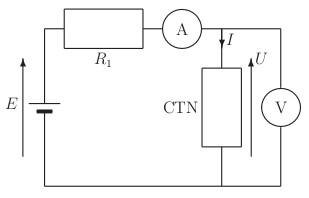

La f.e.m. réglable $E$ est délivrée par la partie variable de l’alimentation continue, entre les bornes 12 et −12 V, afin de délivrer une tension maximale de 24 V. Le voltmètre permet de mesurer la différence de potentiel $U$ aux bornes de la CTN. L’ampèremètre ne mesure pas rigoureusement l’intensité $I$ traversant la CTN, mais
l’erreur systématique introduite est négligeable, compte tenu de la grande résistance d'entrée du voltmètre (10 M$\Omega$). La puissance dissipée par effet Joule est alors ${\cal P}_J = U I$ ; la résistance de la CTN est $R(T) = U/I$. La résistance 
R_1 = 220 $\Omega$ sert de protection au fusible de l’ampèremètre. En effet, le processus risque de s'emballer : en raison
de l'effet Joule, la CTN s'échauffe, sa résistance baisse et, à tension
constante, l'intensité $I$ qui la traverse augmente, ce qui entraîne une
hausse de l'effet Joule, etc.

#### Modélisation du dispositif

L'application du premier principe de la thermodynamique pendant une durée $\mbox{d} t$ conduit à 
$$\mbox{d} H=C\mbox{d} T= {\cal P}_J\mbox{d}t-\Phi \mbox{d} t\ .$$
Une fois le régime stationnaire atteint ($\mbox{d} H=0$), on trouve 
$${\cal P}_J=\Phi\ ,$$
soit
$$UI=hS(T-T_a)\ .$$
La mesure simultanée de $U$ et $I$ permet d'accéder non seulement à ${\cal P}_J$, mais aussi à la résistance $R=U/I$ de la CTN et par conséquent à sa température $T$.


### III - A : Travail expérimental

> 1. Constituer le circuit et réaliser le dispositif expérimental. 

> 2. La température $T_a$ de l’eau, proche de la température ambiante, est mesurée à l’aide d’un thermomètre numérique. Effectuer rapidement quelques mesures simultanées de $U$ et de $I$ pour différentes valeurs élevées de $E$ (24 V, 22 V, 20 V, 18 V, 16 V, 14 V).

> 3. Afin de vérifier la loi de Newton, on souhaite représenter ${\cal P}_J=UI$ en fonction de $T$. Commencer par compléter la cellule suivante 
avec les résultats de mesure.

In [8]:
#%%  Cellule n°5 : données expérimentales

U=np.array([18,16,14,12,10,8])     #Tableau numpy des températures U
I=np.array([,,,,,]) #Tableau numpy des incertitudes sur I

> 4. Compléter lacellule, effectuer la réprésentation graphique de ${\cal P}_J$ en fonction de $T$. Commenter.

In [9]:
#%%  Cellule n°6 : estimation de h

P=U*I                     # Tableau de valeurs de la puissance
R2=U/I                    # Tableau de valeurs de la résistance de la CTN
T2=                       # Tableau de valeurs de la température de la CTN

plt.clf()
plt.plot()     # A compléter
plt.show()


[0.252   0.2     0.154   0.11304 0.0785  0.05024]
[1285.71428571 1280.         1272.72727273 1273.88535032 1273.88535032
 1273.88535032]
[292.72414778 292.83762656 292.98291736 292.95971672 292.95971672
 292.95971672]


> 5. Effectuer la régression linéaire et estimer $h$. Déterminer aussi $T_a$ et comparer avec l'indication du thermomètre.

In [10]:
#%% Cellule n°7 : regression et estimation de h

=np.polyfit()      # Régression à compléter

plt.clf()
plt.plot()          # A compléter
plt.plot()          # A compléter
plt.show()

S=                  # Estimation de S à compléter
h=                  # A compléter
Ta=                 # A compléter 
print('h=',h, 'W/K/m2 et Ta=',Ta, 'K') # Affichage de H et Ta

h= -630112.5821593206 W/K/m2 et Ta= 293.128213995479 K


> 6. Si le temps le permet, reprendre l'étude précédente en tenant compte des incertitudes.